# Anemia types Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('data/diagnosed_cbc_data_v4.csv')

In [3]:
df.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WBC,1281.0,7.862717,3.564466,0.80,6.00000,7.400000,8.68000,45.7
LYMp,1281.0,25.845000,7.038728,6.20,25.84500,25.845000,25.84500,91.4
NEUTp,1281.0,77.511000,147.746273,0.70,71.10000,77.511000,77.51100,5317.0
LYMn,1281.0,1.880760,1.335689,0.20,1.88076,1.880760,1.88076,41.8
NEUTn,1281.0,5.140940,2.872294,0.50,5.10000,5.140940,5.14094,79.0
RBC,1281.0,4.708267,2.817200,1.36,4.19000,4.600000,5.10000,90.8
HGB,1281.0,12.184551,3.812897,-10.00,10.80000,12.300000,13.50000,87.1
HCT,1281.0,46.152600,104.886100,2.00,39.20000,46.152600,46.15260,3715.0
MCV,1281.0,85.793919,27.177663,-79.30,81.20000,86.600000,90.20000,990.0
MCH,1281.0,32.084840,111.170756,10.90,25.50000,27.800000,29.60000,3117.0


In [6]:
cbc_full_names = [
    'WBC', 'Lymphocyte Percentage', 'Neutrophil Percentage',
    'Lymphocyte Number', 'Neutrophil Number', 'RBC',
    'Hemoglobin', 'Hematocrit', 'Mean Corpuscular Volume',
    'Mean Corpuscular Hemoglobin', 'Mean Corpuscular Hemoglobin Concentration',
    'Platelet Count', 'Platelet Distribution Width', 'Procalcitonin'
]
column_mapping = dict(zip(df.columns, cbc_full_names))
df.rename(column_mapping,axis=1,inplace=True)

In [7]:
df.isnull().sum()

WBC                                          0
Lymphocyte Percentage                        0
Neutrophil Percentage                        0
Lymphocyte Number                            0
Neutrophil Number                            0
RBC                                          0
Hemoglobin                                   0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Platelet Count                               0
Platelet Distribution Width                  0
Procalcitonin                                0
Diagnosis                                    0
dtype: int64

# EDA & Preprocessing

<Axes: >

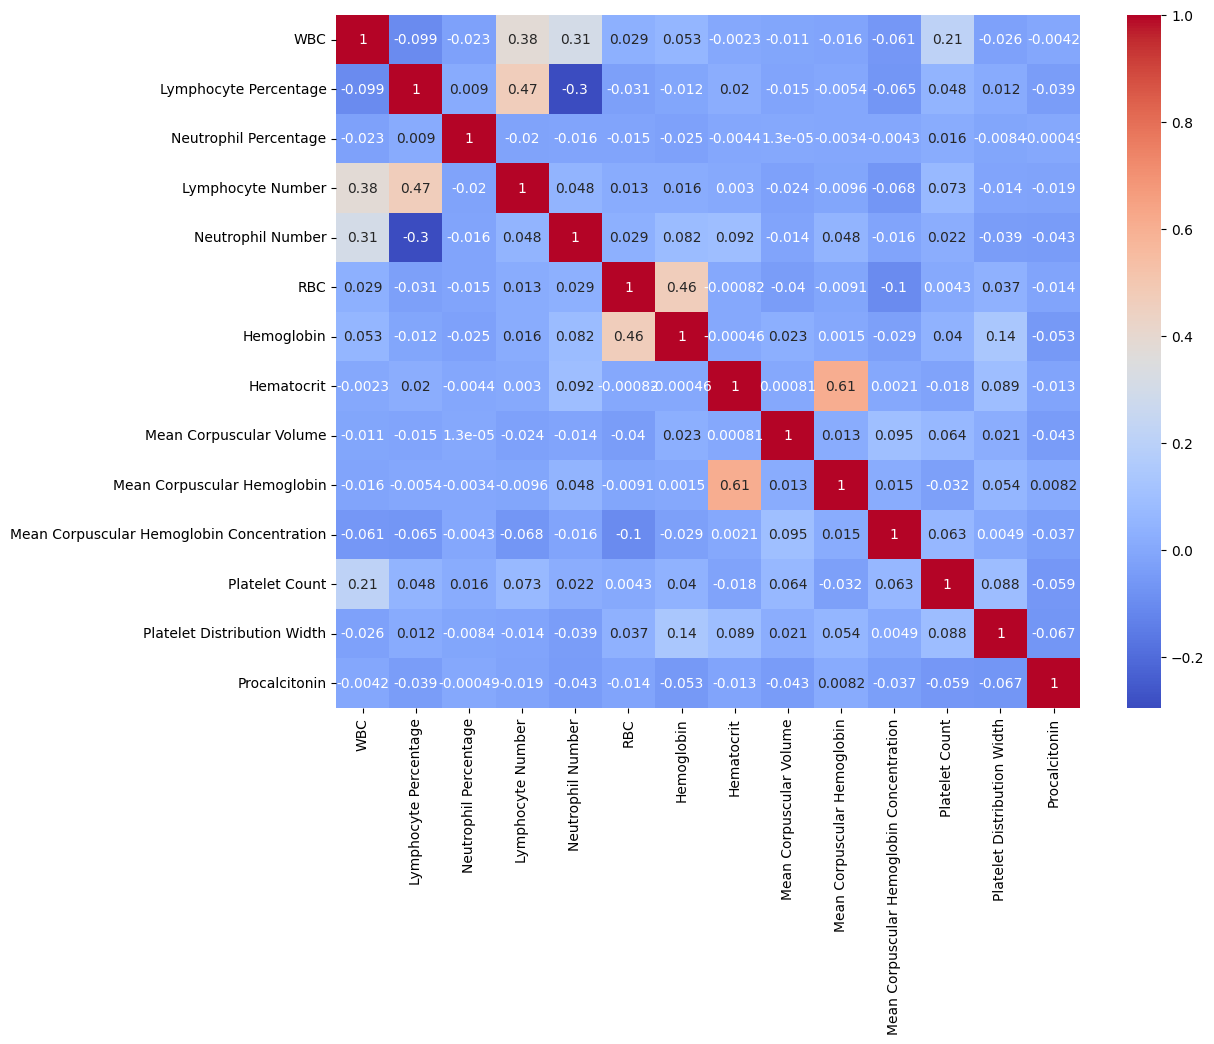

In [8]:
plt.figure(figsize=(12,9))
sns.heatmap(df.drop('Diagnosis',axis=1).corr(),annot=True,cmap='coolwarm')

In [9]:
df.drop(['Hemoglobin','Lymphocyte Number','WBC'],axis=1,inplace=True)

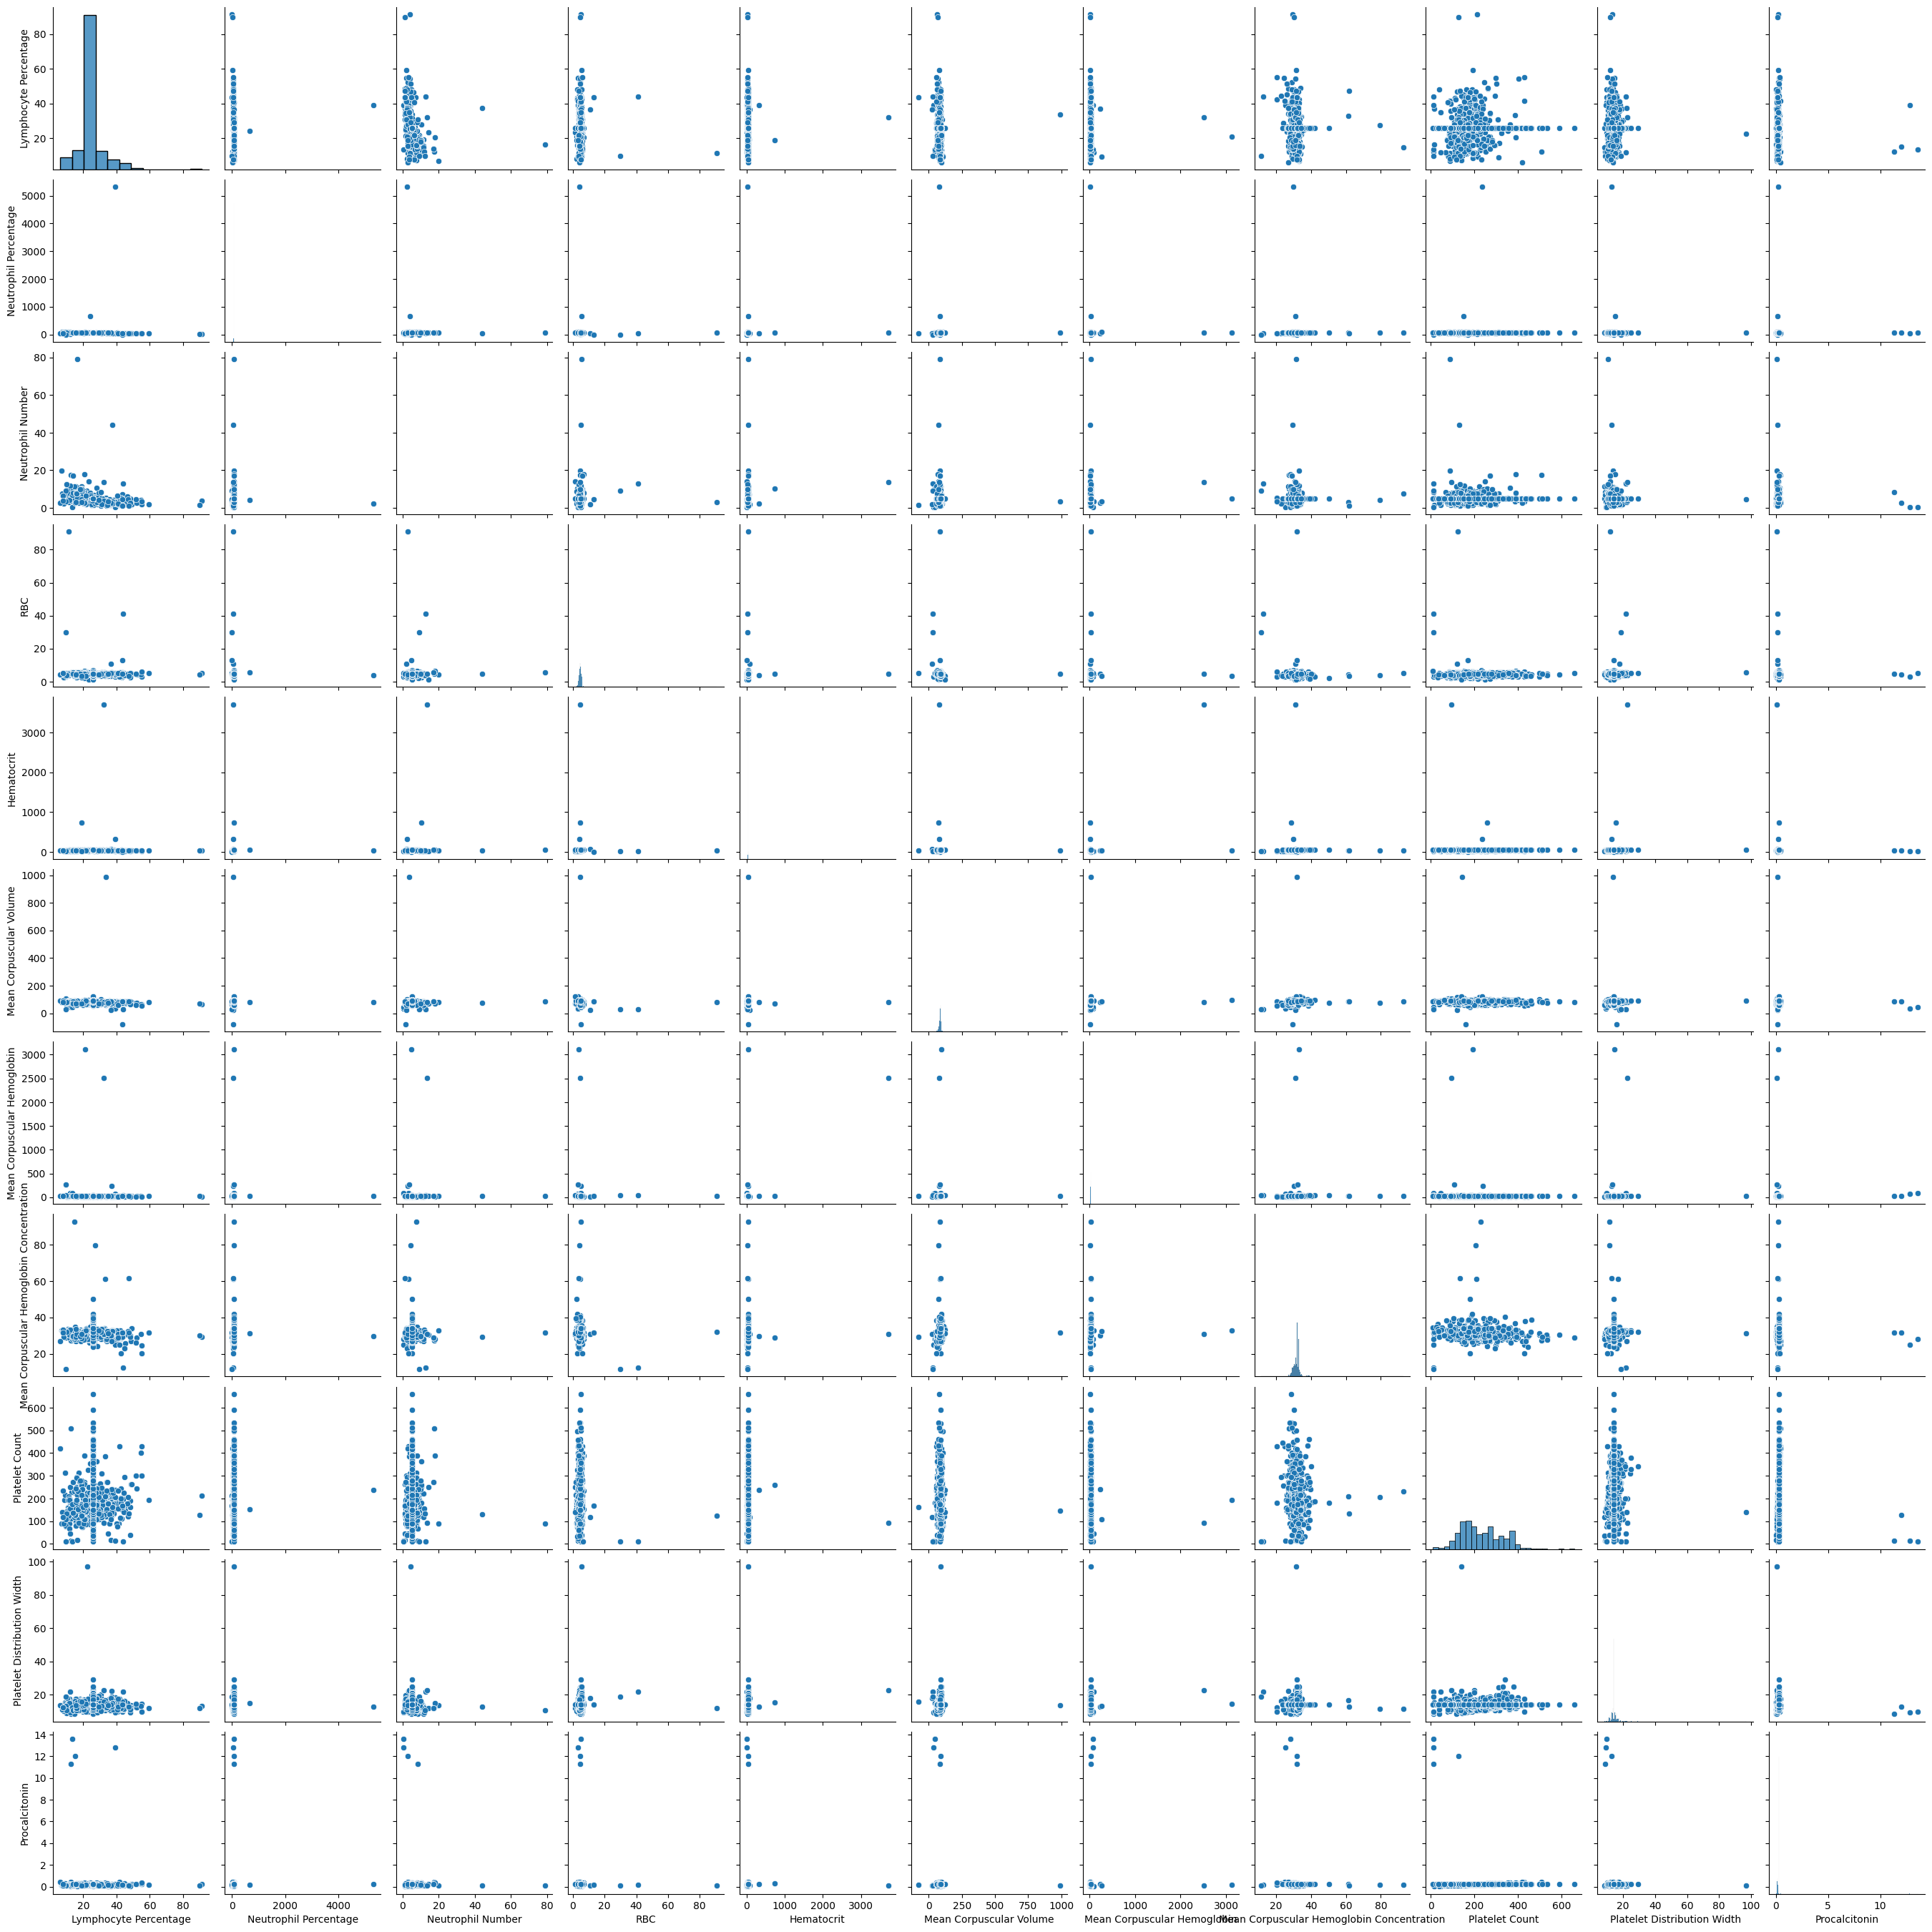

In [10]:
sns.pairplot(df.drop('Diagnosis',axis=1))

<Axes: xlabel='Diagnosis', ylabel='Platelet Count'>

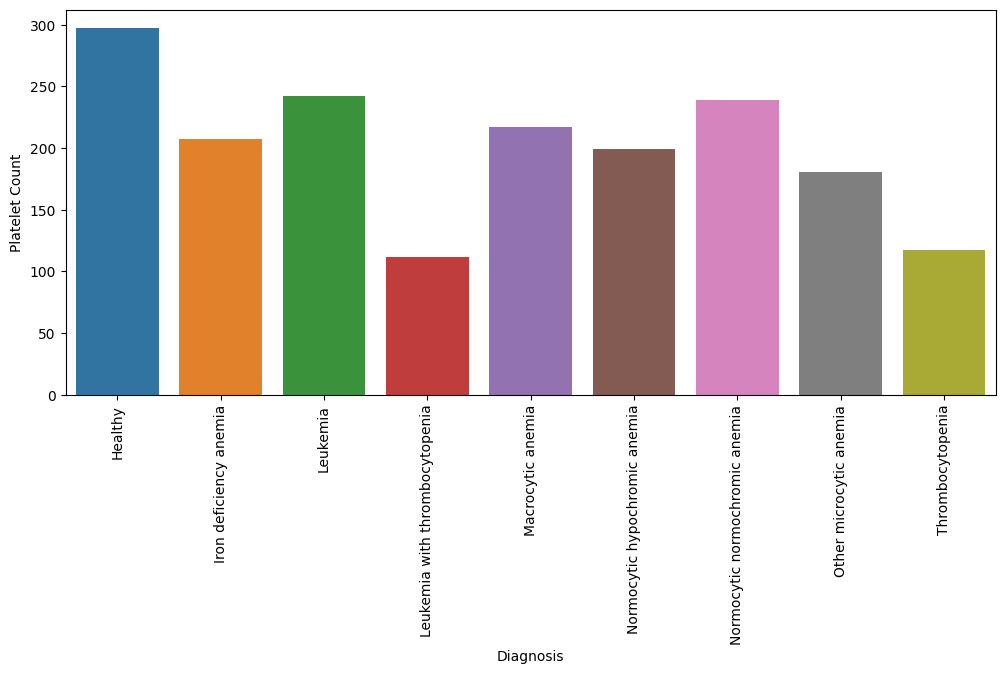

In [10]:
plt.figure(figsize=(12,5))
gb_am = df.groupby(['Diagnosis']).mean()
plt.xticks(rotation = 90)
sns.barplot(gb_am,x=gb_am.index,y='Platelet Count')

<Axes: xlabel='Diagnosis', ylabel='Neutrophil Percentage'>

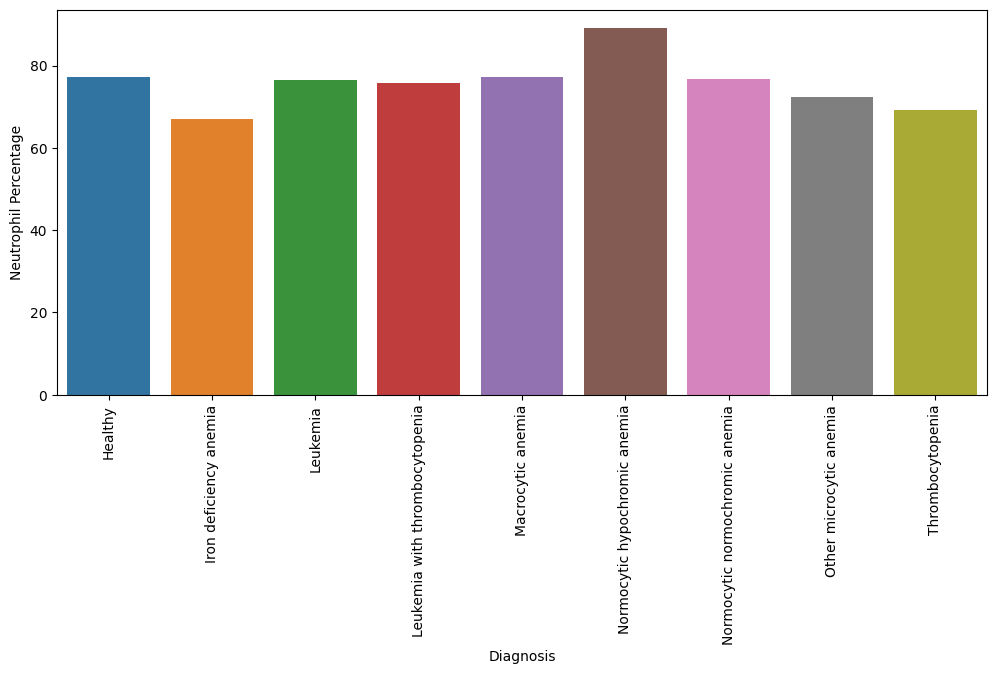

In [11]:
plt.figure(figsize=(12,5))
gb_am = df.groupby(['Diagnosis']).mean()
plt.xticks(rotation = 90)
sns.barplot(gb_am,x=gb_am.index,y='Neutrophil Percentage')

# Insights 
- Healthy Person Have Higher Count Of Platelets Then Anemia Patients

### *Scaling Data To Get More Better Insights*

(-200.0, 200.0)

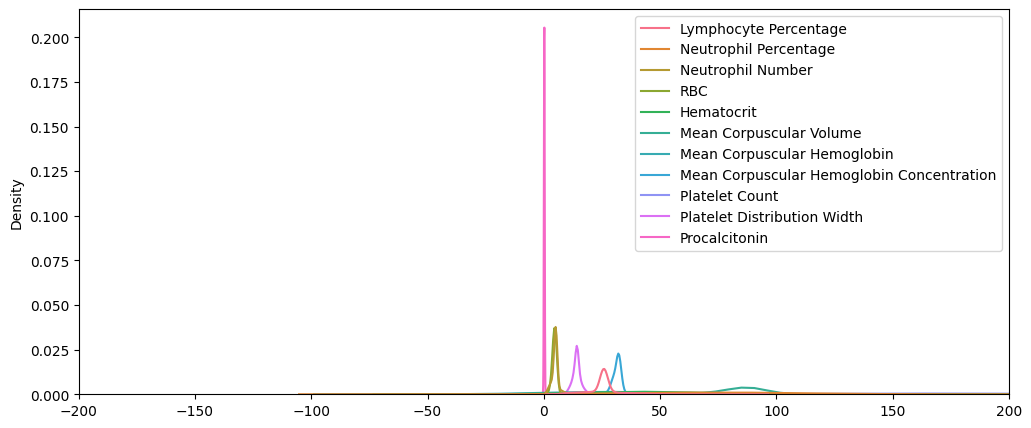

In [12]:
plt.figure(figsize=(12,5))
sns.kdeplot(df.drop('Diagnosis',axis=1))
plt.xlim(left=-200,right=200)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('Diagnosis',axis=1))

In [14]:
df_scaled = pd.DataFrame(scaled_data,columns=df.drop('Diagnosis',axis=1).columns.to_list())

In [15]:
df_scaled.head()

,Lymphocyte Percentage,Neutrophil Percentage,Neutrophil Number,RBC,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Platelet Count,Platelet Distribution Width,Procalcitonin
0,2.466607,-0.185600,-0.049088,-0.688280,-0.209381,0.070161,-0.052056,-0.496853,-0.440741,-0.603385,-0.131780
1,2.352906,-0.170704,0.055399,-0.663423,-0.201751,0.088566,-0.057455,-3.497704,-0.537533,-0.603385,-0.146376
2,0.690025,-0.113827,-0.258062,-0.262159,-0.149293,-0.323698,-0.085351,-0.678723,-0.881682,-0.004165,-0.175570
3,0.618961,-0.094869,-0.467036,-0.173384,-0.127355,-0.290570,-0.079952,-0.587788,-0.935455,-1.002865,-0.204763
4,1.883888,-0.161224,-0.989470,-0.276363,2.573771,-0.191184,-0.073653,-0.618099,0.064728,-0.503515,-0.058796


<Axes: ylabel='Density'>

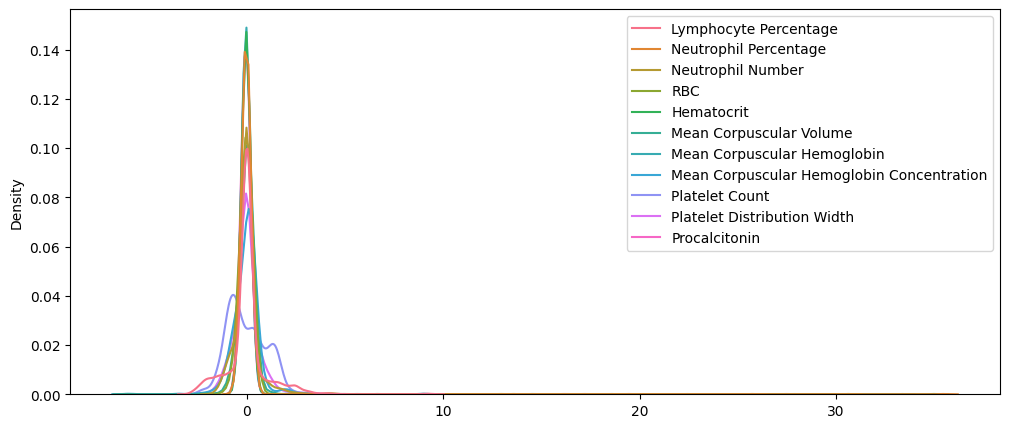

In [16]:
plt.figure(figsize=(12,5))
sns.kdeplot(df_scaled)

In [17]:
df_scaled['Diagnosis'] = df['Diagnosis']

In [18]:
df_scaled.head()

,Lymphocyte Percentage,Neutrophil Percentage,Neutrophil Number,RBC,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Platelet Count,Platelet Distribution Width,Procalcitonin,Diagnosis
0,2.466607,-0.185600,-0.049088,-0.688280,-0.209381,0.070161,-0.052056,-0.496853,-0.440741,-0.603385,-0.131780,Normocytic hypochromic anemia
1,2.352906,-0.170704,0.055399,-0.663423,-0.201751,0.088566,-0.057455,-3.497704,-0.537533,-0.603385,-0.146376,Normocytic hypochromic anemia
2,0.690025,-0.113827,-0.258062,-0.262159,-0.149293,-0.323698,-0.085351,-0.678723,-0.881682,-0.004165,-0.175570,Iron deficiency anemia
3,0.618961,-0.094869,-0.467036,-0.173384,-0.127355,-0.290570,-0.079952,-0.587788,-0.935455,-1.002865,-0.204763,Iron deficiency anemia
4,1.883888,-0.161224,-0.989470,-0.276363,2.573771,-0.191184,-0.073653,-0.618099,0.064728,-0.503515,-0.058796,Normocytic hypochromic anemia


<Axes: >

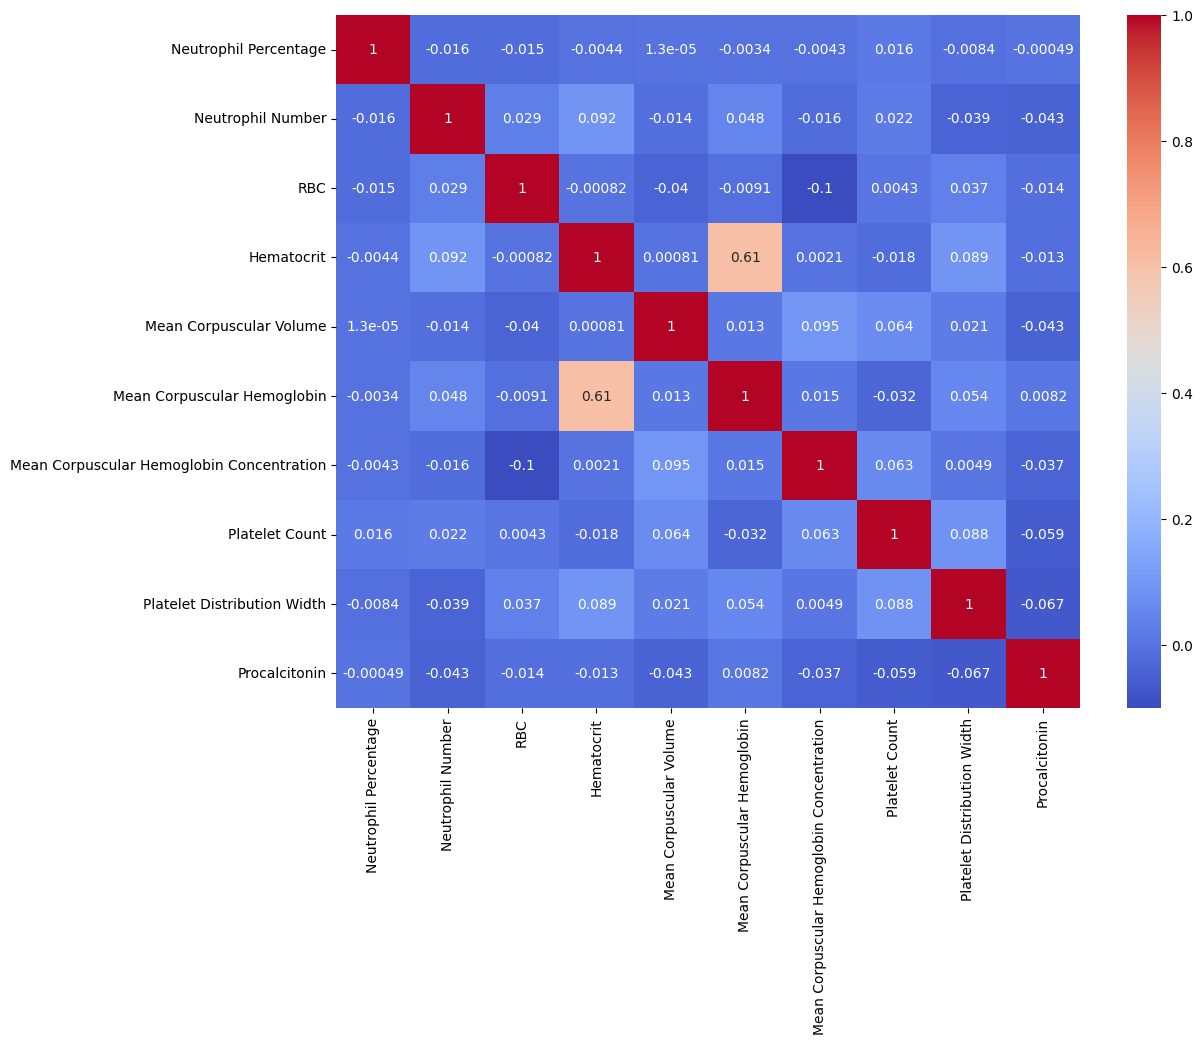

In [19]:
plt.figure(figsize=(12,9))
sns.heatmap(df_scaled.drop(['Lymphocyte Percentage','Diagnosis'],axis=1).corr(),annot=True,cmap='coolwarm')

<Axes: xlabel='Diagnosis', ylabel='RBC'>

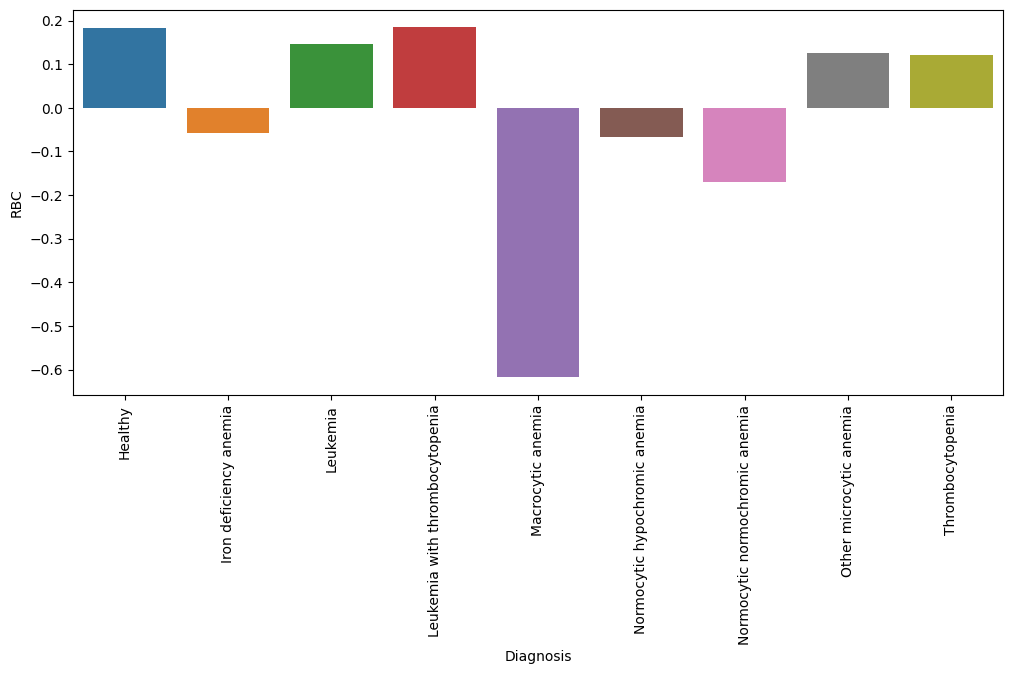

In [20]:
plt.figure(figsize=(12,5))
gb_am = df_scaled.groupby(['Diagnosis']).mean()
plt.xticks(rotation = 90)
sns.barplot(gb_am,x=gb_am.index,y='RBC')

<Axes: xlabel='Diagnosis', ylabel='Mean Corpuscular Volume'>

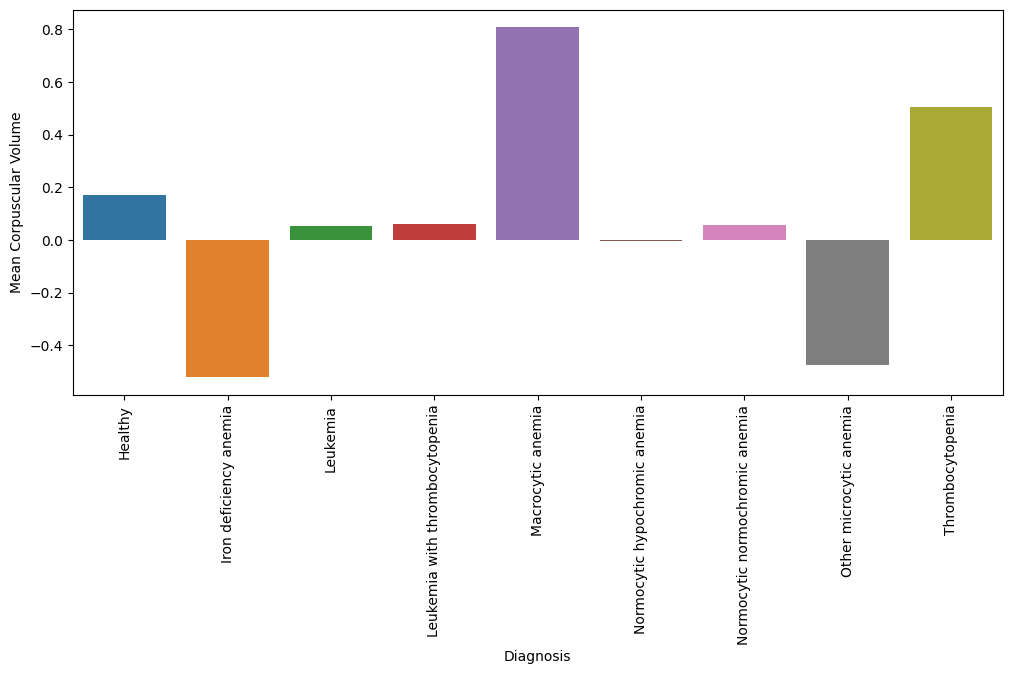

In [21]:
plt.figure(figsize=(12,5))
gb_am = df_scaled.groupby(['Diagnosis']).mean()
plt.xticks(rotation = 90)
sns.barplot(gb_am,x=gb_am.index,y='Mean Corpuscular Volume')

# Insights 
- Anemia Of type {'Thrombocytopenia','Other microcytic anemia','Leukemia','Leukemia with thrombocytopenia'} Have Less Affects on RBC
- Anemia Of type {'Macrocytic anemia'} has Higher MCV Value(Size of RBC) 
- Anemia of type { 'Iron deficiency anemia', 'Other microcytic anemia'} Has Less MCV Value 

# Model Training , Testing & Tuning

### Using Original Data

In [22]:
y = df['Diagnosis'] 
X = df.drop('Diagnosis',axis=1) 

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [25]:
from sklearn.metrics import classification_report
predictions = rf.predict(X_test)
print('Normal_Data:\n',classification_report(predictions,y_test))

Normal_Data:
                                 precision    recall  f1-score   support

                       Healthy       0.87      0.94      0.90       121
        Iron deficiency anemia       1.00      0.97      0.98        59
                      Leukemia       0.45      0.50      0.48        10
Leukemia with thrombocytopenia       0.67      1.00      0.80         2
             Macrocytic anemia       0.50      0.33      0.40         3
 Normocytic hypochromic anemia       0.96      0.97      0.96        97
Normocytic normochromic anemia       1.00      0.90      0.95        87
       Other microcytic anemia       1.00      0.90      0.95        21
              Thrombocytopenia       0.88      0.91      0.89        23

                      accuracy                           0.92       423
                     macro avg       0.81      0.83      0.81       423
                  weighted avg       0.93      0.92      0.93       423



### Using Softmax (Multinomial Logistic Regression) With Scaled Data

In [34]:
y = df_scaled['Diagnosis']
X = df_scaled.drop('Diagnosis',axis=1)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression
sm = LogisticRegression(multi_class='multinomial', solver="lbfgs", random_state=42)
sm.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=42)

In [43]:
from sklearn.metrics import classification_report
predictions = sm.predict(X_test)
print('Scaled_Data:\n',classification_report(predictions,y_test))

Scaled_Data:
                                 precision    recall  f1-score   support

                       Healthy       0.73      0.79      0.75       121
        Iron deficiency anemia       0.93      0.82      0.87        65
                      Leukemia       0.09      1.00      0.17         1
Leukemia with thrombocytopenia       0.33      1.00      0.50         1
             Macrocytic anemia       0.00      0.00      0.00         0
 Normocytic hypochromic anemia       0.68      0.60      0.64       112
Normocytic normochromic anemia       0.68      0.56      0.62        94
       Other microcytic anemia       0.11      0.33      0.16         6
              Thrombocytopenia       0.71      0.74      0.72        23

                      accuracy                           0.68       423
                     macro avg       0.47      0.65      0.49       423
                  weighted avg       0.72      0.68      0.70       423



## Hyperparameter Tuning

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a RandomForestClassifier estimator
rfc = RandomForestClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X,y)
grid_search.best_score_

0.8167071984435796

In [106]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [44]:
rfc = RandomForestClassifier(
    bootstrap=False,
    max_depth=10,
    max_features="log2",
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
)

In [45]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, max_features='log2')

In [46]:
y = df['Diagnosis'] 
X = df.drop('Diagnosis',axis=1) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rfc.fit(X_train,y_train)
from sklearn.metrics import classification_report
predictions = rfc.predict(X_test)
print('Normal_Data:\n',classification_report(predictions,y_test))

Normal_Data:
                                 precision    recall  f1-score   support

                       Healthy       0.85      0.94      0.90       119
        Iron deficiency anemia       1.00      0.97      0.98        59
                      Leukemia       0.36      0.67      0.47         6
Leukemia with thrombocytopenia       0.00      0.00      0.00         0
             Macrocytic anemia       1.00      0.50      0.67         4
 Normocytic hypochromic anemia       0.97      0.95      0.96       100
Normocytic normochromic anemia       0.99      0.91      0.94        85
       Other microcytic anemia       1.00      0.90      0.95        21
              Thrombocytopenia       0.92      0.76      0.83        29

                      accuracy                           0.92       423
                     macro avg       0.79      0.73      0.74       423
                  weighted avg       0.93      0.92      0.92       423



*Training Different Models*

In [54]:
from sklearn import svm

# Create the SVC model
svc = svm.SVC()

y = df_scaled['Diagnosis'] 
X = df_scaled.drop('Diagnosis',axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
svc.fit(X_train, y_train)


SVC()

In [55]:
predictions = svc.predict(X_test)
print(classification_report(predictions,y_test))

                                precision    recall  f1-score   support

                       Healthy       0.70      0.89      0.79       103
        Iron deficiency anemia       0.79      0.87      0.83        52
                      Leukemia       0.09      1.00      0.17         1
Leukemia with thrombocytopenia       0.00      0.00      0.00         0
             Macrocytic anemia       0.00      0.00      0.00         0
 Normocytic hypochromic anemia       0.83      0.61      0.70       132
Normocytic normochromic anemia       0.83      0.56      0.67       117
       Other microcytic anemia       0.00      0.00      0.00         0
              Thrombocytopenia       0.58      0.78      0.67        18

                      accuracy                           0.70       423
                     macro avg       0.43      0.52      0.42       423
                  weighted avg       0.78      0.70      0.73       423



In [56]:
from sklearn.ensemble import AdaBoostClassifier
y = df['Diagnosis'] 
X = df.drop('Diagnosis',axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=42)

# Train the model
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

In [57]:
predictions = abc.predict(X_test)
print(classification_report(predictions,y_test))

                                precision    recall  f1-score   support

                       Healthy       0.95      0.37      0.53       335
        Iron deficiency anemia       0.00      0.00      0.00         0
                      Leukemia       0.00      0.00      0.00        81
Leukemia with thrombocytopenia       0.00      0.00      0.00         0
             Macrocytic anemia       1.00      0.29      0.44         7
 Normocytic hypochromic anemia       0.00      0.00      0.00         0
Normocytic normochromic anemia       0.00      0.00      0.00         0
       Other microcytic anemia       0.00      0.00      0.00         0
              Thrombocytopenia       0.00      0.00      0.00         0

                      accuracy                           0.30       423
                     macro avg       0.22      0.07      0.11       423
                  weighted avg       0.77      0.30      0.43       423



In [62]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
y = df['Diagnosis']
X = df.drop('Diagnosis',axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
encoder = OrdinalEncoder(categories=[df['Diagnosis'].unique().tolist()])

df['Diagnosis'] = encoder.fit_transform(df[['Diagnosis']])

df.head()


,Lymphocyte Percentage,Neutrophil Percentage,Neutrophil Number,RBC,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Platelet Count,Platelet Distribution Width,Procalcitonin,Diagnosis
0,43.2,50.1,5.0,2.77,24.2,87.7,26.3,30.1,189.0,12.5,0.17,0.0
1,42.4,52.3,5.3,2.84,25.0,88.2,25.7,20.2,180.0,12.5,0.16,0.0
2,30.7,60.7,4.4,3.97,30.5,77.0,22.6,29.5,148.0,14.3,0.14,1.0
3,30.2,63.5,3.8,4.22,32.8,77.9,23.2,29.8,143.0,11.3,0.12,1.0
4,39.1,53.7,2.3,3.93,316.0,80.6,23.9,29.7,236.0,12.8,0.22,0.0


In [63]:
from xgboost import XGBClassifier

# Create an instance of the XGBClassifier
xgc = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)

# Fit the model to the training data
xgc.fit(X_train, y_train)



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [64]:
predictions = xgc.predict(X_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        94
           1       0.98      0.98      0.98        57
           2       1.00      0.83      0.90        23
           3       0.36      0.44      0.40         9
           4       0.89      0.94      0.91       125
           5       0.96      0.74      0.84        31
           6       0.96      0.94      0.95        80
           7       0.33      1.00      0.50         1
           8       1.00      0.67      0.80         3

    accuracy                           0.92       423
   macro avg       0.83      0.83      0.81       423
weighted avg       0.93      0.92      0.92       423

